In [386]:
import string
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize


from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


## Download NLTK Resourcex

In [349]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/cisco/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/cisco/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Unit Function

In [351]:
wordnet_lemma = WordNetLemmatizer()

In [352]:
def clean_text(text: str):
    #removing upper case 
    text = text.lower()
    
    #removing puntuation
    for char in string.punctuation:
        text = text.replace(char, "")
        
    #lemmatizing the words and join back into string text
    text = ' '.join([wordnet_lemma.lemmatize(word) for word in word_tokenize(text)])
    
    return text

### loading data  

In [354]:
movie = pd.read_csv('imdb_labelled.txt', delimiter = '\t', names=["review", "rating"])
movie

,review,rating
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


## creating Labels(Positive and Negative)

In [356]:
movie['labels'] = movie["rating"].apply(lambda x: "Positive" if x else "Negative")
movie 

,review,rating,labels
0,"A very, very, very slow-moving, aimless movie ...",0,Negative
1,Not sure who was more lost - the flat characte...,0,Negative
2,Attempting artiness with black & white and cle...,0,Negative
3,Very little music or anything to speak of.,0,Negative
4,The best scene in the movie was when Gerardo i...,1,Positive
...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,Negative
744,"Unfortunately, any virtue in this film's produ...",0,Negative
745,"In a word, it is embarrassing.",0,Negative
746,Exceptionally bad!,0,Negative


In [357]:
movie.iloc[2]['review']

'Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  '

## Checking for missing values 

In [359]:
movie.isna().sum()

review    0
rating    0
labels    0
dtype: int64

## Creating Length of each document 

In [361]:
movie['length'] = movie['review'].apply(lambda x: len(str(x).split(' ')))
movie

,review,rating,labels,length
0,"A very, very, very slow-moving, aimless movie ...",0,Negative,15
1,Not sure who was more lost - the flat characte...,0,Negative,21
2,Attempting artiness with black & white and cle...,0,Negative,33
3,Very little music or anything to speak of.,0,Negative,10
4,The best scene in the movie was when Gerardo i...,1,Positive,23
...,...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,Negative,13
744,"Unfortunately, any virtue in this film's produ...",0,Negative,16
745,"In a word, it is embarrassing.",0,Negative,8
746,Exceptionally bad!,0,Negative,4


In [362]:
movie['length'].unique()

array([  15,   21,   33,   10,   23,   22,    5,   17,   12,    8,   13,
          6,   18,   25,   19,  868,   14,   16,    9,    7,   26,   35,
         11,    4,   27,   28,    3,   20,   37,   24,   36,  201, 1393,
         49,   30,  306,   31,   32,   44,   56,   45,   34,   38,   64,
         58,   40,   47,   29,   73,   41,   39,   55,   53,   42,  800])

<BarContainer object of 55 artists>

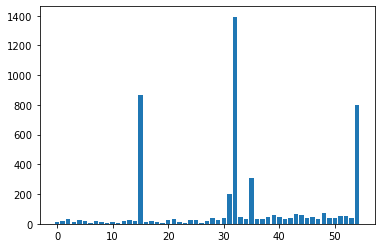

In [363]:
unique_lengths = movie['length'].unique()
plt.bar(np.arange(len(unique_lengths)), unique_lengths)

In [364]:
movie['clean_data'] = movie['review'].apply(clean_text)
movie.head()

,review,rating,labels,length,clean_data
0,"A very, very, very slow-moving, aimless movie ...",0,Negative,15,a very very very slowmoving aimless movie abou...
1,Not sure who was more lost - the flat characte...,0,Negative,21,not sure who wa more lost the flat character o...
2,Attempting artiness with black & white and cle...,0,Negative,33,attempting artiness with black white and cleve...
3,Very little music or anything to speak of.,0,Negative,10,very little music or anything to speak of
4,The best scene in the movie was when Gerardo i...,1,Positive,23,the best scene in the movie wa when gerardo is...


## Text Preprocessing 

In [368]:
X = movie['clean_data']
y = movie['rating']

In [369]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .40, random_state = 60)

In [370]:
token.shape, X_train.to_list()[:4]

((448,),
 ['i am so tired of clichés that is just lazy writing and here they come in thick and fast',
  'nothing short of magnificent photographycinematography in this film',
  'the acting wa bad the dialog were extremely shallow and insincere',
  'the soundtrack wasnt terrible either'])

In [371]:
X_train.shape

(448,)

## training with count Vectorizer and BernuolliNB

In [373]:
vectorizer = Pipeline([
    ('Bag_of_words', CountVectorizer(stop_words = 'english')), 
    ('classifier', BernoulliNB()),
])

In [374]:
model = vectorizer.fit(X_train, y_train)

In [375]:
model_predict = model.predict(X_test)

In [376]:
from sklearn.metrics import classification_report

In [377]:
print(classification_report(y_test, model_predict))

              precision    recall  f1-score   support

           0       0.67      0.91      0.77       155
           1       0.85      0.53      0.65       145

    accuracy                           0.73       300
   macro avg       0.76      0.72      0.71       300
weighted avg       0.76      0.73      0.72       300



In [391]:
accurancy = []
stratifiedKf_predict = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)
stratifiedKf_predict.get_n_splits(X,y)

for train_index, test_index in stratifiedKf_predict.split(X,y):
   
    X1_train, X1_test = X.iloc[train_index], X.iloc[test_index]
    y1_train, y1_test = y.iloc[train_index], y.iloc[test_index]
  
    vectorizer.fit(X1_train, y1_train)
    result = vectorizer.score(X1_test, y1_test)
    accurancy.append(result)

accuracy = np.array(accurancy)


print('list of first 10 possible accurancy')
for index, acc in enumerate(accuracy[:10]):
    print(f"{index+1:3d}. {acc:.4f}")

    
print('\nMetrics that were obtain from the model:')
print(f' Maximum accuracy: {accuracy.max()*100:.2f}%')
print(f' Minimum Accuracy: {accuracy.min()*100:.2f}%')
print(f' Mean_accuracy: {accuracy.mean()*100:.2f}%')
print(f' Std_accuracy: {accuracy.std()*100:.2f}%')

print(accurancy) 

list of first 10 possible accurancy
  1. 0.7600
  2. 0.7133
  3. 0.7733
  4. 0.7919
  5. 0.7181

Metrics that were obtain from the model:
 Maximum accuracy: 79.19%
 Minimum Accuracy: 71.33%
 Mean_accuracy: 75.13%
 Std_accuracy: 3.08%
[0.76, 0.7133333333333334, 0.7733333333333333, 0.7919463087248322, 0.7181208053691275]


## Training with Tfidf with BernuolliNB

In [380]:
vectorizer = Pipeline([
    ('Term_freq', TfidfVectorizer()),
    ('classifier', BernoulliNB()),
])

In [381]:
model = vectorizer.fit(X_train, y_train)

In [382]:
model_predict = model.predict(X_test)

In [383]:
from sklearn.metrics import classification_report

In [384]:
print(classification_report(y_test, model_predict))

              precision    recall  f1-score   support

           0       0.71      0.90      0.80       155
           1       0.86      0.61      0.71       145

    accuracy                           0.76       300
   macro avg       0.79      0.76      0.76       300
weighted avg       0.78      0.76      0.76       300



## Runing cross validation with tfidf and Bernuolli NB

In [390]:
accurancy = []

stratifiedKf_predict = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)
stratifiedKf_predict.get_n_splits(X,y)

for train_index, test_index in stratifiedKf_predict.split(X,y):
   
    X1_train, X1_test = X.iloc[train_index], X.iloc[test_index]
    y1_train, y1_test = y.iloc[train_index], y.iloc[test_index]
  
    vectorizer.fit(X1_train, y1_train)
    result = vectorizer.score(X1_test, y1_test)
    accurancy.append(result)

accuracy = np.array(accurancy)

# print the ouput
print('list of first 10 possible accurancy')
for index, acc in enumerate(accuracy[:10]):
    print(f"{index+1:3d}. {acc:.4f}")

    
print('\nMetrics that were obtain from the model:')
print(f' Maximum accuracy: {accuracy.max()*100:.2f}%')
print(f' Minimum Accuracy: {accuracy.min()*100:.2f}%')
print(f' Mean_accuracy: {accuracy.mean()*100:.2f}%')
print(f' Std_accuracy: {accuracy.std()*100:.2f}%')

print(accurancy)
print(f' mean_accuarcy = {accuracy.mean():.4f}, std_accuracy = {accuracy.std():.4f}')  

list of first 10 possible accurancy
  1. 0.7600
  2. 0.7133
  3. 0.7733
  4. 0.7919
  5. 0.7181

Metrics that were obtain from the model:
 Maximum accuracy: 79.19%
 Minimum Accuracy: 71.33%
 Mean_accuracy: 75.13%
 Std_accuracy: 3.08%
[0.76, 0.7133333333333334, 0.7733333333333333, 0.7919463087248322, 0.7181208053691275]
 mean_accuarcy = 0.7513, std_accuracy = 0.0308


SyntaxError: invalid syntax (<ipython-input-1-f188d5ac1197>, line 1)

In [2]:
!git init

Reinitialized existing Git repository in /home/cisco/Downloads/sentiment_analysis/.git/


In [3]:
!git add

Nothing specified, nothing added.
Maybe you wanted to say 'git add .'?


In [4]:
!git add .